# Feature Selection Techniques

Feature selection is important step bcz not all featurer are importnant here we see hw we  select the feature selection all technique. 

The goal of feature selection in machine learning is to find the best set of features that allows one to build useful models of studied phenomena.

The techniques for feature selection in machine learning can be broadly classified into the following categories:

- Supervised Techniques: These techniques can be used for labeled data, and are used to identify the relevant features for increasing the efficiency of supervised models like classification and regression.

- Unsupervised Techniques: These techniques can be used for unlabeled data


- A. Filter methods

- B. Wrapper methods

- C. Embedded methods

- D. Hybrid methods



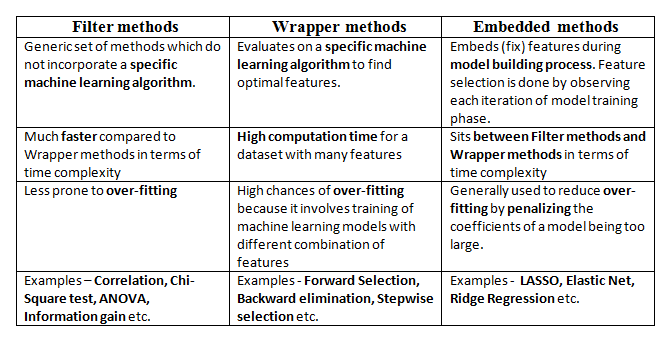


There are several more reasons to complete feature selection, such as:

- Simple models are easier to interpret: It’s much easier to understand the output of a model that uses 10 variables than an output that uses 100 variables.

- Shorter training time: Reducing the number of variables reduces the computation cost, speeds up model training, and perhaps most importantly—simpler models tend to have faster prediction times.

- Enhanced generalization by reducing overfitting: Oftentimes, many of the variables are just noise with little prediction value. However, the ML model learns from this noise and causes overfitting while simultaneously reducing generalization. By eliminating these irrelevant noisy features, we can substantially improve the generalization of ML models.

- Variable redundancy: Features of a given dataset are frequently highly correlated, and we know that highly-correlated features provide the same information, which makes them redundant. In cases like these, we can keep just one feature and remove the redundant features without losing any information. Less redundant data means less opportunity for the model to make noise-based predictions.

### Feature Selection vs. Feature Engineering

Often, newcomers to the field of machine learning may get confused between feature selection and feature engineering.

Feature engineering allows us to create new features from the ones they already have in order to help the machine learning model make more effective and accurate predictions.

Feature selection, on the other hand, allows us to select features from the feature pool (including any newly-engineered ones) that will help machine learning models more efficiently make predictions on target variables.

In a typical ML pipeline, we perform feature selection after completing feature engineering.

In [2]:
import pandas as pd
df = pd.read_csv('mobile_dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Here are some important technique to select the feature.
in this we discuss about duplicate of feature,correlation of feature,information gain of the feature,Univariant Selection is a type statical ,forward selection  backward selection of feeature,

### one assignment 

Hw to check the duplicate column and duplicate row?


In [42]:
import pandas as pd
# List of Tuples
students = [
            ('Ankit', 34, 'Uttar pradesh', 34),
            ('Riti', 30, 'Delhi', 30),
            ('Aadi', 16, 'Delhi', 16),
            ('Riti', 30, 'Delhi', 30),
            ('Riti', 30, 'Delhi', 30),
            ('Riti', 30, 'Mumbai', 30),
            ('Ankita', 40, 'Bihar', 40),
            ('Sachin', 30, 'Delhi', 30)
         ]

# Create a DataFrame object
df = pd.DataFrame(students, columns =['Name', 'Age', 'Domicile', 'Marks'])
  
# Print a original dataframe
df

,Name,Age,Domicile,Marks
0,Ankit,34,Uttar pradesh,34
1,Riti,30,Delhi,30
2,Aadi,16,Delhi,16
3,Riti,30,Delhi,30
4,Riti,30,Delhi,30
5,Riti,30,Mumbai,30
6,Ankita,40,Bihar,40
7,Sachin,30,Delhi,30


Find duplicate columns in a DataFrame.
To find duplicate columns we need to iterate through all columns of a DataFrame and for each and every column it will search if any other column exists in DataFrame with the same contents already. If yes then that column name will be stored in the duplicate column set. In the end, the function will return the list of column names of the duplicate column.

In [43]:

# This function take a dataframe
# as a parameter and returning list
# of column names whose contents 
# are duplicates.
def getDuplicateColumns(df):
     
    # Create an empty set
    duplicateColumnNames = set()
      
    # Iterate through all the columns 
    # of dataframe
    for x in range(df.shape[1]):
          
        # Take column at xth index.
        col = df.iloc[:, x]
        
        # Iterate through all the columns in
        # DataFrame from (x + 1)th index to
        # last index
        for y in range(x + 1, df.shape[1]):
              
            # Take column at yth index.
            otherCol = df.iloc[:, y]
              
            # Check if two columns at x & y
            # index are equal or not,
            # if equal then adding 
            # to the set
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                
         # Return list of unique column names 
       # whose contents are duplicates.
    return list(duplicateColumnNames)         
                

In [45]:
# Get list of duplicate columns
duplicateColNames = getDuplicateColumns(df)

In [48]:
print('Duplicate Columns are :')

# Iterate through duplicate
    # column names
for column in duplicateColNames :
       print('Column Name : ', column)

Duplicate Columns are :
Column Name :  Marks


Like this we remove the duplicacy in Row and check

In [51]:
## Dropping the dupllicated columns
rslt_df = df.drop(columns = getDuplicateColumns(df))
print("Resultant Dataframe :")
  
# Show the dataframe
rslt_df

Resultant Dataframe :


,Name,Age,Domicile
0,Ankit,34,Uttar pradesh
1,Riti,30,Delhi
2,Aadi,16,Delhi
3,Riti,30,Delhi
4,Riti,30,Delhi
5,Riti,30,Mumbai
6,Ankita,40,Bihar
7,Sachin,30,Delhi


In [55]:
# To remove the duplicate row is:
dublicate_row = rslt_df[rslt_df.duplicated(subset=None,keep='first')]

In [56]:
print("Duplicate Rows except first occurrence based on all columns are :")
print(dublicate_row)

Duplicate Rows except first occurrence based on all columns are :
   Name  Age Domicile
3  Riti   30    Delhi
4  Riti   30    Delhi


## UNIVARIATE ANALYSIS

In [3]:
X = df.iloc[:,:-1]
y = df['price_range']

In [4]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [5]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [7]:
df.shape

(2000, 21)

In [9]:
### Apply SelectKBest Algorithm
## here we apply chi2 to select the feature based on the hypothesis
ordered_rank_features = SelectKBest(score_func=chi2,k=20)
ordered_feature = ordered_rank_features.fit(X,y)

In [10]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x0000000009A42D30>)

In [11]:
dfscores = pd.DataFrame(ordered_feature.scores_,columns=['Score'])
dfcolumns=pd.DataFrame(X.columns)

In [12]:
features_rank = pd.concat([dfcolumns,dfscores],axis=1)

In [16]:
features_rank.columns=['Features','Score']

In [17]:
features_rank

,Features,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [18]:
features_rank.nlargest(10,'Score')

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


This score say that hw important are our feautres.

This Techniques give you a score for each feautre of your data,the higher the score more relevant it is.

one happen when the feature are mix type?

fiorst do feature enginnering convert the categorucal variable into int then apply feature selection technique


 # Feature Importance

This technique gives you a score for each Feautre of your data,the higher the score more relevant it is

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [20]:
print(model.feature_importances_)

[0.06199716 0.02099453 0.03416313 0.01955666 0.03332462 0.01752245
 0.03644766 0.03324361 0.03727944 0.03453188 0.03406653 0.04771899
 0.04938102 0.38396259 0.03470752 0.0339888  0.03475096 0.0143528
 0.01826159 0.01974805]


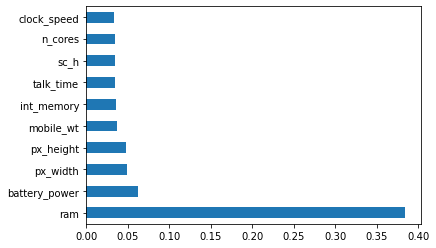

In [21]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

# Correlation

When ur independent feature increse with dependent feature it callled positive correlation, when ur it decrease with that we called negative correalation 

In [24]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:>

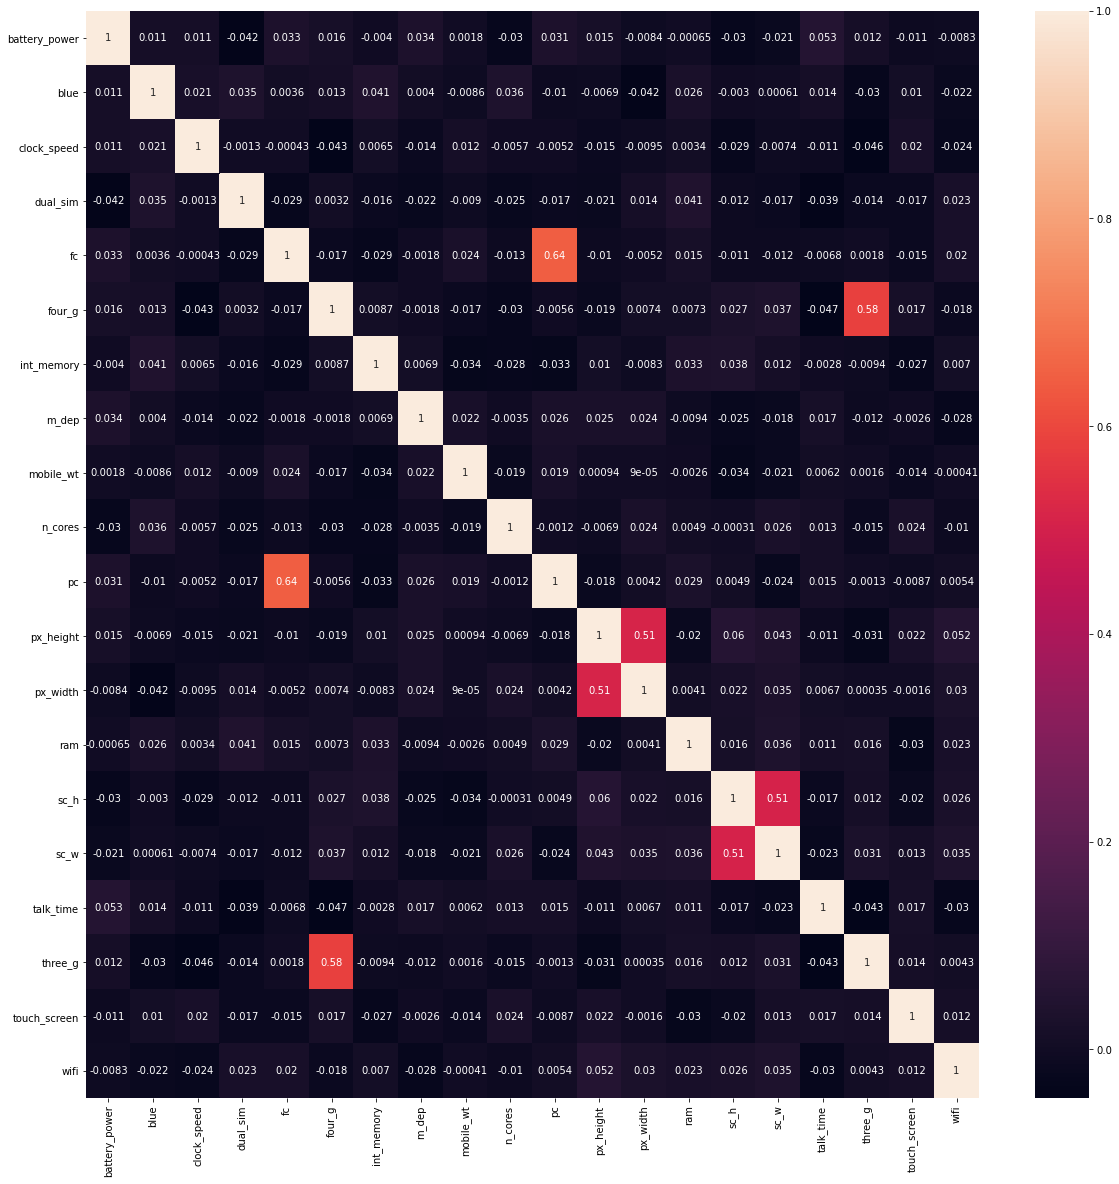

In [25]:
#Here we remove the Dependent feature and find the correlation
import seaborn as sns
corr=df.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

#### REmove The Correlated Featture

### remember we never remove the feature which is correlated with the dependent feature but we remove the feature which is correlated with the independent feature 

LIke our one of the our indepndent feature are highly correlated with other like 0.8 then we drop one feature and select one feature bcz they doing the ssame task

In [27]:
#### Remove The correlated Feature 

threshold=0.8

In [28]:

# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [30]:
correlation(df.iloc[:,:-1],threshold)

set()

# INformation GAin

Mutual information (MI) [1]_ between two random variables is a non-negative
value, which measures the dependency between the variables. It is equal
to zero if and only if two random variables are independent, and higher
values mean higher dependency.

In [32]:
from sklearn.feature_selection import mutual_info_classif

In [33]:

mutual_info=mutual_info_classif(X,y)

In [34]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

ram              0.848135
px_height        0.030592
battery_power    0.029116
px_width         0.026247
sc_w             0.021454
four_g           0.013453
touch_screen     0.006985
n_cores          0.006393
blue             0.004909
int_memory       0.000482
sc_h             0.000000
pc               0.000000
talk_time        0.000000
mobile_wt        0.000000
m_dep            0.000000
three_g          0.000000
fc               0.000000
dual_sim         0.000000
clock_speed      0.000000
wifi             0.000000
dtype: float64

# Feature Selection - Dropping constant features

Featurer selection is very important step bcz of dimensionality Curse

In this step we will be removing the features which have constant features which are actually not important for solving the problem statement

In [36]:
# IMport pandas to create DataFrame
import pandas as pd

# Make DataFrame of the given data 
data = pd.DataFrame({"A":[1,2,4,1,2,4], 
                    "B":[4,5,6,7,8,9], 
                    "C":[0,0,0,0,0,0],
                    "D":[1,1,1,1,1,1]})


In [37]:
data.head()

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1


### VAriance Thershold

Feature Selector that removes all low variance feature

This Feature selection algorithm looks only at the feature (X),not the desired outputs(y) and can thus be used for unsupervised learning.

In [40]:
#### It will zero variance fetures
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [41]:
var_thres.get_support()

array([ True,  True, False, False])

In [42]:
data.columns[var_thres.get_support()]

Index(['A', 'B'], dtype='object')

In [43]:
constant_columns = [column for column in data.columns
                    if column not in data.columns[var_thres.get_support()]]

print(len(constant_columns))

2


In [44]:
for feature in constant_columns:
     print(feature)

C
D


In [45]:
data.drop(constant_columns,axis=1)

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8
5,4,9


### Lets Practise on bigger Dataset

In [47]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

In [48]:
df = pd.read_csv('santander.csv',nrows=10000)

In [49]:
df.shape

(10000, 371)

In [50]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [52]:
X=df.drop(labels=['TARGET'],axis=1)
y=df['TARGET']

In [53]:

from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['TARGET'], axis=1),
    df['TARGET'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((7000, 370), (3000, 370))

#### LETS APPLY THE VARIANCE THRESHOLD

In [54]:
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [55]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [56]:
### Finding non constant features
sum(var_thres.get_support())

284

In [57]:
# Lets Find non-constant features
len(X_train.columns[var_thres.get_support()])

284

In [58]:

constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

86


In [59]:

for column in constant_columns:
    print(column)

ind_var2_0
ind_var2
ind_var13_medio_0
ind_var13_medio
ind_var18_0
ind_var18
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var34_0
ind_var34
ind_var41
ind_var46_0
ind_var46
num_var13_medio_0
num_var13_medio
num_var18_0
num_var18
num_var27_0
num_var28_0
num_var28
num_var27
num_var34_0
num_var34
num_var41
num_var46_0
num_var46
saldo_var13_medio
saldo_var18
saldo_var28
saldo_var27
saldo_var34
saldo_var41
saldo_var46
delta_imp_amort_var18_1y3
delta_imp_amort_var34_1y3
delta_imp_reemb_var17_1y3
delta_imp_reemb_var33_1y3
delta_imp_trasp_var17_out_1y3
delta_imp_trasp_var33_out_1y3
delta_num_reemb_var17_1y3
delta_num_reemb_var33_1y3
delta_num_trasp_var17_out_1y3
delta_num_trasp_var33_out_1y3
imp_amort_var18_hace3
imp_amort_var18_ult1
imp_amort_var34_hace3
imp_amort_var34_ult1
imp_var7_emit_ult1
imp_reemb_var13_hace3
imp_reemb_var17_hace3
imp_reemb_var17_ult1
imp_reemb_var33_hace3
imp_reemb_var33_ult1
imp_trasp_var17_in_hace3
imp_trasp_var17_out_hace3
imp_trasp_var17_out_ult1
imp_trasp_var33_i

In [60]:

X_train.drop(constant_columns,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
7681,15431,2,42,840.0,4477.02,4989.54,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37491.21
9031,18181,2,31,0.0,52.32,52.32,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106685.94
3691,7411,2,51,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66144.66
202,407,2,36,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92121.36
5625,11280,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74650.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,18564,2,33,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117547.89
4859,9723,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71050.83
3264,6557,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,141069.33
9845,19796,2,38,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86412.15


LIKe this remove the all low variance features

### FEature Selection - With Correlation

In this step we will be removing the features which are highly correlated

In [61]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
#Loading the dataset
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["MEDV"] = data.target

In [63]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [64]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [65]:
X = df.drop("MEDV",axis=1)   #Feature Matrix
y = df["MEDV"]

In [66]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [67]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.196172,0.382073,-0.049364,0.416560,-0.188280,0.329927,-0.355840,0.603880,0.560570,0.264780,-0.299525,0.439369
ZN,-0.196172,1.000000,-0.529392,-0.063863,-0.523572,0.319260,-0.583885,0.658331,-0.314833,-0.327834,-0.392838,0.164641,-0.429178
INDUS,0.382073,-0.529392,1.000000,0.044224,0.750218,-0.392969,0.629257,-0.686848,0.578459,0.719038,0.388353,-0.331638,0.603374
CHAS,-0.049364,-0.063863,0.044224,1.000000,0.043748,0.088125,0.067269,-0.085492,0.022338,-0.017156,-0.072683,0.069682,-0.059060
NOX,0.416560,-0.523572,0.750218,0.043748,1.000000,-0.279202,0.740052,-0.765753,0.627188,0.683445,0.179046,-0.369445,0.577154
RM,-0.188280,0.319260,-0.392969,0.088125,-0.279202,1.000000,-0.235839,0.183857,-0.179242,-0.275242,-0.385526,0.157459,-0.623920
AGE,0.329927,-0.583885,0.629257,0.067269,0.740052,-0.235839,1.000000,-0.761543,0.440578,0.502429,0.239729,-0.250416,0.606530
DIS,-0.355840,0.658331,-0.686848,-0.085492,-0.765753,0.183857,-0.761543,1.000000,-0.467653,-0.519643,-0.176620,0.248376,-0.501780
RAD,0.603880,-0.314833,0.578459,0.022338,0.627188,-0.179242,0.440578,-0.467653,1.000000,0.907455,0.437687,-0.415325,0.442783
TAX,0.560570,-0.327834,0.719038,-0.017156,0.683445,-0.275242,0.502429,-0.519643,0.907455,1.000000,0.447518,-0.412145,0.515905


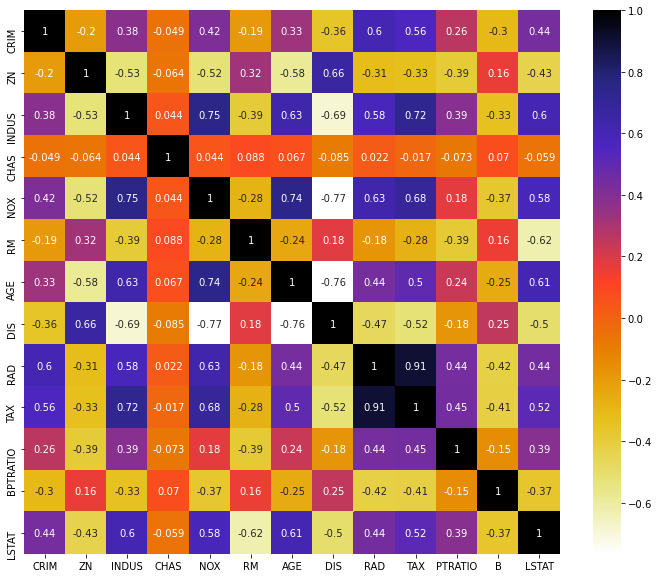

In [68]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [69]:

# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [70]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

4

In [71]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [72]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,6.333,4.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,6.216,24.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,6.373,5.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,5.349,24.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,6.232,5.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,7.147,3.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0.0,6.193,24.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,5.277,24.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,6.635,4.0,18.4,396.90,4.54


#### Lets try with Big Dataset

In [73]:
df=pd.read_csv('santander.csv',nrows=10000)
X=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['TARGET'], axis=1),
    df['TARGET'],
    test_size=0.3,
    random_state=0)

<AxesSubplot:>

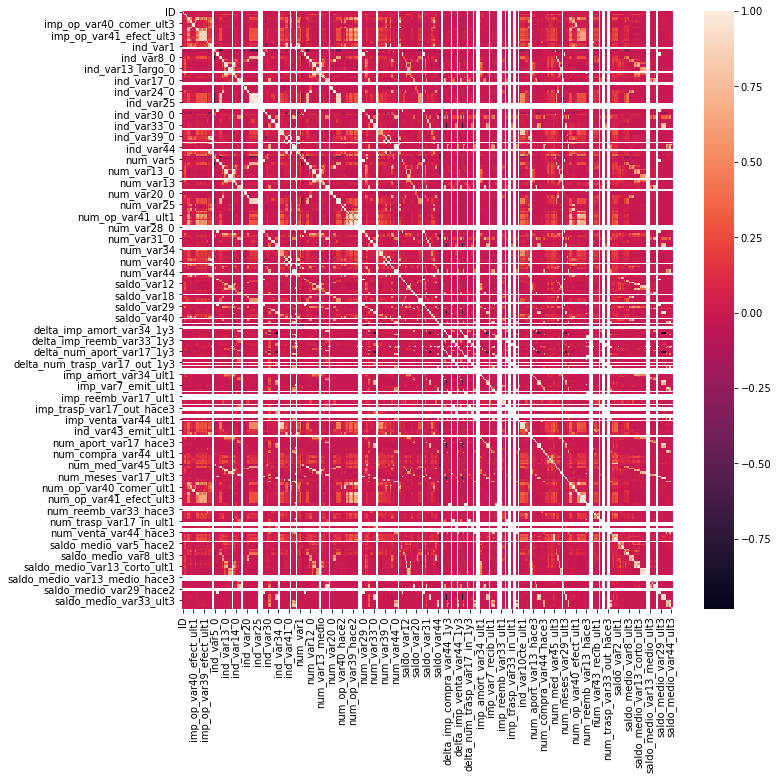

In [74]:
import seaborn as sns
#Using Pearson Correlation
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [75]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

156

In [76]:
corr_features

{'delta_imp_aport_var33_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_reemb_var13_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'imp_venta_var44_ult1',
 'ind_var10cte_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var20',
 'ind_var24',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var29',
 'ind_var29_0',
 'ind_var31',
 'ind_var32',
 'ind_var32_0',
 'ind_var37',
 'ind_var37_0',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var44',
 'ind_var6',
 'ind_var8',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_aport_

In [77]:
X_train.drop(corr_features,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var41_comer_ult1,...,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var44_hace2,var38
7681,15431,2,42,840.0,4477.02,4989.54,0.0,0.0,0,4477.02,...,0,0,0,0,0.0,0.0,0.0,0,0.0,37491.21
9031,18181,2,31,0.0,52.32,52.32,0.0,0.0,0,52.32,...,0,0,0,0,0.0,0.0,0.0,0,0.0,106685.94
3691,7411,2,51,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,66144.66
202,407,2,36,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,92121.36
5625,11280,2,23,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,74650.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,18564,2,33,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,117547.89
4859,9723,2,24,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,71050.83
3264,6557,2,24,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,141069.33
9845,19796,2,38,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,86412.15


## Feature Selection-Information gain - mutual information In Classification Problem Statements

##### Mutual information

MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows

#### I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [78]:
import pandas as pd

In [79]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [80]:
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [82]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Wine'], axis=1),
    df['Wine'],
    test_size=0.3,
    random_state=0)

In [83]:
X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


In [84]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.42612391, 0.28932667, 0.16344513, 0.23813412, 0.15296648,
       0.46760714, 0.71362142, 0.12615155, 0.27093433, 0.62048889,
       0.55334543, 0.54585833, 0.54128955])

In [85]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.713621
Color.int               0.620489
Hue                     0.553345
OD                      0.545858
Proline                 0.541290
Phenols                 0.467607
Alcohol                 0.426124
Malic.acid              0.289327
Proanth                 0.270934
Acl                     0.238134
Ash                     0.163445
Mg                      0.152966
Nonflavanoid.phenols    0.126152
dtype: float64

<AxesSubplot:>

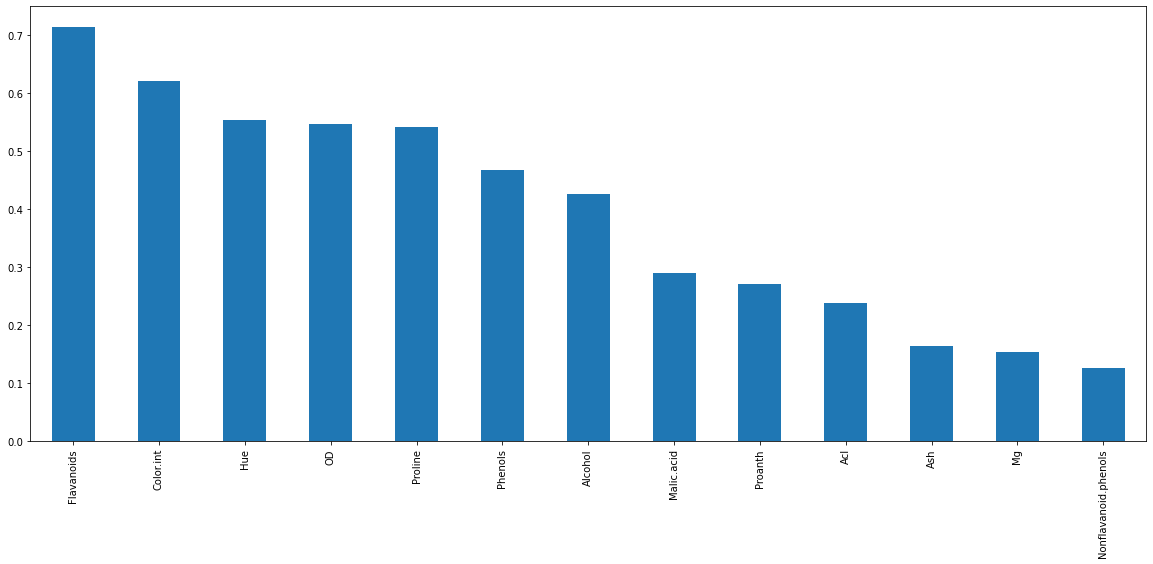

In [86]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [87]:

from sklearn.feature_selection import SelectKBest

In [88]:

#Now we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

#### Difference Between Information Gain And Mutual Information

I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data

   ## Comparion of Univariate And Mutual Information

Comparison of F-test and mutual information https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py


# Feature Selection-Information gain - mutual information In Regression Problem Statements

In [89]:
import pandas as pd 

Mutual Information

Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [3]:
import pandas as pd
housing_df=pd.read_csv('h_train.csv')

In [4]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(housing_df.select_dtypes(include=numeric_lst).columns)

In [6]:
housing_df=housing_df[numerical_cols]

In [7]:
housing_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [8]:

housing_df=housing_df.drop("Id",axis=1)

In [9]:

### It is always a good practice to split train and test data to avoid
#overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(housing_df.drop(labels=['SalePrice'], axis=1),
    housing_df['SalePrice'],
    test_size=0.3,
    random_state=0)

In [10]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,60,NaN,9375,7,5,1997,1998,573.0,739,0,...,645,576,36,0,0,0,0,0,2,2009
682,120,NaN,2887,6,5,1996,1997,0.0,1003,0,...,431,307,0,0,0,0,0,0,11,2008
960,20,50.0,7207,5,7,1958,2008,0.0,696,0,...,0,117,0,0,0,0,0,0,2,2010
1384,50,60.0,9060,6,5,1939,1950,0.0,204,0,...,280,0,0,0,0,0,0,0,10,2009
1100,30,60.0,8400,2,5,1920,1950,0.0,290,0,...,246,0,0,0,0,0,0,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,82.0,9430,8,5,1999,1999,673.0,1163,0,...,856,0,128,0,0,180,0,0,7,2009
835,20,60.0,9600,4,7,1950,1995,0.0,442,0,...,436,290,0,0,0,0,0,0,2,2010
1216,90,68.0,8930,6,5,1978,1978,0.0,0,0,...,539,0,0,0,0,0,0,0,4,2010
559,120,NaN,3196,7,5,2003,2004,18.0,0,0,...,420,143,20,0,0,0,0,0,10,2006


In [11]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.25675102, 0.21186974, 0.16575012, 0.52817659, 0.11312602,
       0.34624814, 0.24936067, 0.08969331, 0.16933793, 0.        ,
       0.11168431, 0.38198918, 0.31157113, 0.22675537, 0.        ,
       0.47942256, 0.03595718, 0.00620116, 0.26394676, 0.07167961,
       0.04194555, 0.01647049, 0.18157932, 0.1798689 , 0.27217675,
       0.36694535, 0.36930384, 0.07521365, 0.17087112, 0.01335155,
       0.0146811 , 0.02333082, 0.00647309, 0.00222921, 0.        ,
       0.00767661])

In [12]:

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.528177
GrLivArea        0.479423
TotalBsmtSF      0.381989
GarageArea       0.369304
GarageCars       0.366945
YearBuilt        0.346248
1stFlrSF         0.311571
GarageYrBlt      0.272177
FullBath         0.263947
MSSubClass       0.256751
YearRemodAdd     0.249361
2ndFlrSF         0.226755
LotFrontage      0.211870
TotRmsAbvGrd     0.181579
Fireplaces       0.179869
OpenPorchSF      0.170871
BsmtFinSF1       0.169338
LotArea          0.165750
OverallCond      0.113126
BsmtUnfSF        0.111684
MasVnrArea       0.089693
WoodDeckSF       0.075214
HalfBath         0.071680
BedroomAbvGr     0.041946
BsmtFullBath     0.035957
ScreenPorch      0.023331
KitchenAbvGr     0.016470
3SsnPorch        0.014681
EnclosedPorch    0.013352
YrSold           0.007677
PoolArea         0.006473
BsmtHalfBath     0.006201
MiscVal          0.002229
BsmtFinSF2       0.000000
LowQualFinSF     0.000000
MoSold           0.000000
dtype: float64

<AxesSubplot:>

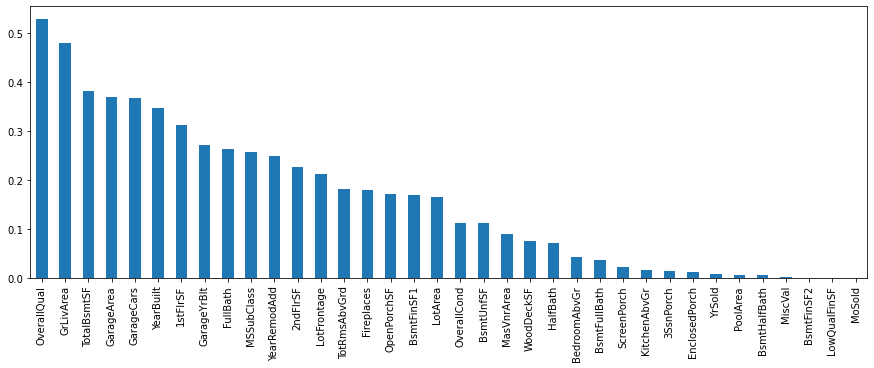

In [13]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [14]:
from sklearn.feature_selection import SelectPercentile

In [15]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x000000000BB711F0>)

In [16]:

selected_top_columns.get_support()

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [17]:

X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

# Fisher Score- Chisquare Test For Feature Selection

Compute chi-squared stats between each non-negative feature and class.

This score should be used to evaluate categorical variables in a classification task.
This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification. The Chi Square statistic is commonly used for testing relationships between categorical variables.

It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

In [20]:
import seaborn as sns
df=sns.load_dataset('titanic')

In [21]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [22]:
##['sex','embarked','alone','pclass','Survived']
df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [28]:
df['sex']=np.where(df['sex']=="male",1,0)
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,False,3,0
1,0,1,False,1,1
2,0,0,True,3,1
3,0,0,False,1,1
4,1,0,True,3,0


In [29]:
### Let's perform label encoding on sex column
import numpy as np
### let's perform label encoding on embarked
ordinal_label = {k: i for i, k in enumerate(df['embarked'].unique(), 0)}
df['embarked'] = df['embarked'].map(ordinal_label)

In [30]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,False,3,0
1,0,1,False,1,1
2,0,0,True,3,1
3,0,0,False,1,1
4,1,0,True,3,0


In [31]:
### let's perform label encoding on alone
df['alone']=np.where(df['alone']==True,1,0)

In [32]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [33]:
### train Test split is usually done to avaoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['sex','embarked','alone','pclass']],
                                              df['survived'],test_size=0.3,random_state=100)

In [34]:

X_train.head()

,sex,embarked,alone,pclass
69,1,0,0,3
85,0,0,0,3
794,1,0,1,3
161,0,0,1,2
815,1,0,1,1


In [35]:
X_train['sex'].unique()

array([1, 0])

In [36]:
X_train.isnull().sum()

sex         0
embarked    0
alone       0
pclass      0
dtype: int64

In [37]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [41]:
# Greater f value good and saller p vlaue good
f_p_values

(array([65.67929505,  7.55053653, 10.88471585, 21.97994154]),
 array([5.30603805e-16, 5.99922095e-03, 9.69610546e-04, 2.75514881e-06]))

In [39]:

import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

sex         5.306038e-16
embarked    5.999221e-03
alone       9.696105e-04
pclass      2.755149e-06
dtype: float64

In [40]:
p_values.sort_index(ascending=False)

sex         5.306038e-16
pclass      2.755149e-06
embarked    5.999221e-03
alone       9.696105e-04
dtype: float64

Observation¶

Sex Column is the most important column when compared to the output feature Survived

### A. Filter methods

Filter methods select features from a dataset independently for any machine learning algorithm. These methods rely only on the characteristics of these variables, so features are filtered out of the data before learning begins.
These methods are powerful and simple and help to quickly remove features— and they are generally the first step in any feature selection pipeline


Filter methods pick up the intrinsic properties of the features measured via univariate statistics instead of cross-validation performance. These methods are faster and less computationally expensive than wrapper methods. When dealing with high-dimensional data, it is computationally cheaper to use filter methods.

### Filter Methods: Advantages

- Selected features can be used in any machine learning algorithm,

- They’re computationally inexpensive—you can process thousands of features in a matter of seconds.

Filter methods are very good for eliminating irrelevant, redundant, constant, duplicated, and correlated features.

#### Filter Methods: Types

There are two types of filter methods: Univariate and Multivariate.

-Univariate filter methods evaluate and rank a single feature according to certain criteria.

They treat each feature individually and independently of the feature space. This is how it functions in practice:

- It ranks features according to certain criteria.

- Then select the highest ranking features according to those criteria.

One problem that can occur with univariate methods is they may select a redundant variable, as they don’t take into consideration the relationship between features.


Multivariate filter methods, on the other hand, evaluate the entire feature space. They take into account features in relation to other ones in the dataset.

These methods are able to handle duplicated, redundant, and correlated features.

#### The Methods

In recent years, numerous methods and techniques have been proposed for univariate and multivariate filter-based feature selection. In the remainder of this article, we’ll explore the following methods in-depth, along with some code:

- Basic Filter Methods

- Correlation Filter Methods

- Statistical & Ranking Filter Methods

Let’s, discuss some of these techniques:

## Basic Filter Methods

These basic and intuitive methods help to remove:

- Constant Features that show single values in all the observations in the dataset. These features provide no information that allows ML models to predict the target.



In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
data = pd.read_csv('h_train.csv')

## COnstant Features

In [109]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop(['SalePrice'], axis=1), 
                                                    data.SalePrice, test_size=0.3, 
                                                    random_state=0)

In [110]:
numerical_x_train = x_train[x_train.select_dtypes([np.number]).columns]

In [111]:
from sklearn.feature_selection import VarianceThreshold
vs_constant = VarianceThreshold(threshold=0)

In [112]:
vs_constant.fit(numerical_x_train)

VarianceThreshold(threshold=0)

In [113]:
len(x_train[x_train.select_dtypes([np.number]).columns].columns[vs_constant.get_support()])

37

In [114]:
constant_columns = [column for column in numerical_x_train.columns
                    if column not in numerical_x_train.columns[vs_constant.get_support()]]

In [115]:
len(constant_columns)

0

In [116]:
constant_cat_columns = [column for column in x_train.columns 
                        if (x_train[column].dtype == "O" and len(x_train[column].unique())  == 1 )]

In [117]:
all_constant_columns = constant_cat_columns + constant_columns

In [118]:
x_train.drop(labels=constant_columns, axis=1, inplace=True)
x_test.drop(labels=constant_columns, axis=1, inplace=True)

### Quasi-Constant Features 

in which a value occupies the majority of the records.

In [119]:

threshold = 0.98

# create empty list
quasi_constant_feature = []

# loop over all the columns
for feature in x_train.columns:

    # calculate the ratio.
    predominant = (x_train[feature].value_counts() / np.float(len(x_train))).sort_values(ascending=False).values[0]
    
    # append the column name if it is bigger than the threshold
    if predominant >= threshold:
        quasi_constant_feature.append(feature)   
        
print(quasi_constant_feature)

['Street', 'Utilities', 'Condition2', 'LowQualFinSF', '3SsnPorch', 'PoolArea']


In [120]:
# drop the quasi constant columns
x_train.drop(labels=quasi_constant_feature, axis=1, inplace=True)
x_test.drop(labels=quasi_constant_feature, axis=1, inplace=True)

### Duplicated Features,

which is self-explanatory—the same feature.

In [121]:
train_features_T = x_train.T
train_features_T.head()

,64,682,960,1384,1100,416,1034,853,472,1011,...,1094,599,277,1033,1383,763,835,1216,559,684
Id,65,683,961,1385,1101,417,1035,854,473,1012,...,1095,600,278,1034,1384,764,836,1217,560,685
MSSubClass,60,120,20,50,30,60,30,80,180,90,...,20,160,20,20,30,60,20,90,120,60
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RM,RL,RL,RL,RL,RL,RM,RL,RL
LotFrontage,NaN,NaN,50,60,60,74,50,NaN,35,75,...,74,24,140,NaN,NaN,82,60,68,NaN,58
LotArea,9375,2887,7207,9060,8400,7844,6305,12095,3675,9825,...,5868,1950,19138,8125,25339,9430,9600,8930,3196,16770


In [122]:
train_features_T = x_train.T
train_features_T.head()

,64,682,960,1384,1100,416,1034,853,472,1011,...,1094,599,277,1033,1383,763,835,1216,559,684
Id,65,683,961,1385,1101,417,1035,854,473,1012,...,1095,600,278,1034,1384,764,836,1217,560,685
MSSubClass,60,120,20,50,30,60,30,80,180,90,...,20,160,20,20,30,60,20,90,120,60
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RM,RL,RL,RL,RL,RL,RM,RL,RL
LotFrontage,NaN,NaN,50,60,60,74,50,NaN,35,75,...,74,24,140,NaN,NaN,82,60,68,NaN,58
LotArea,9375,2887,7207,9060,8400,7844,6305,12095,3675,9825,...,5868,1950,19138,8125,25339,9430,9600,8930,3196,16770


In [123]:
duplicated_columns = train_features_T[train_features_T.duplicated()].index.values

In [124]:
x_train.drop(labels=duplicated_columns, axis=1, inplace=True)
x_test.drop(labels=duplicated_columns, axis=1, inplace=True)

## Correlation Filter Methods

Besides duplicate features, a dataset can also include correlated features.

Correlation is defined as a measure of the linear relationship between two quantitative variables, like height and weight. You could also define correlation is a measure of how strongly one variable depends on another.

A high correlation is often a useful property—if two variables are highly correlated, we can predict one from the other. Therefore, we generally look for features that are highly correlated with the target, especially for linear machine learning models.

However, if two variables are highly correlated among themselves, they provide redundant information in regards to the target. Essentially, we can make an accurate prediction on the target with just one of the redundant variables.

In these cases, the second variable doesn’t add additional information, so removing it can help to reduce the dimensionality and also the added noise.

There are a number of methods to measure the correlation between variables—let’s explore the most widely used ones.

#### Pearson correlation coefficient

This is a popular measure we use frequently in machine learning. It’s used to summarize the strength of the linear relationship between two data variables, which can vary between 1 and -1:

- 1 means a positive correlation: the values of one variable increase as the values of another increase.

- -1 means a negative correlation: the values of one variable decrease as the values of another increase.

- 0 means no linear correlation between the two variables.

The assumptions that the Pearson correlation coefficient makes:

- Both variables should be normally distributed.

- A straight-line relationship between the two variables.

- Data is equally distributed around the regression line.

The following formula is used to calculate the value of the Pearson correlation coefficient:

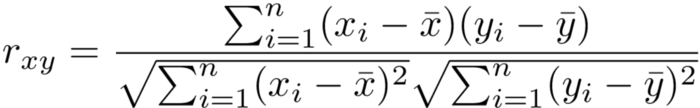

### Spearman’s rank correlation coefficient

Sometimes two variables can be related in a nonlinear relationship, which can be stronger or weaker across the distribution of the variables.

And this is where Spearman’s rank correlation coefficient comes into play. It’s a non-parametric test that’s used to measure the degree of association between two variables with a monotonic function, meaning an increasing or decreasing relationship.

The measured strength between the variables using Spearman’s correlation varies between+1 and −1, which occurs when each of the variables is a perfect monotone function of the other. It's a lot like Pearson’s correlation, but whereas Pearson’s correlation assesses linear relationships, Spearman’s correlation assesses monotonic relationships (whether linear or not).

Spearman’s coefficient is suitable for both continuous and discrete ordinal variables.

The Spearman’s rank correlation test doesn’t carry any assumptions about the distribution of the data.

The following formula is used to calculate the value of Spearman’s rank correlation coefficient:



#### Kendall’s rank correlation coefficient

Kendall’s rank correlation coefficient is a non-parametric test that measures the strength of the ordinal association between two variables. It calculates a normalized score for the number of matching or concordant rankings between the two data samples.

Kendall’s correlation varies between 1 and -1. It will take the value of 1 (high) when observations have a similar rank between the two variables, and value of -1 (low) when observations have a dissimilar rank between the two variables.

This type of correlation is best suited for discrete data.

The following formula is used to calculate the value of Kendall’s rank correlation:




In [125]:
correlated_features = set()
correlation_matrix = x_train.corr()

<AxesSubplot:>

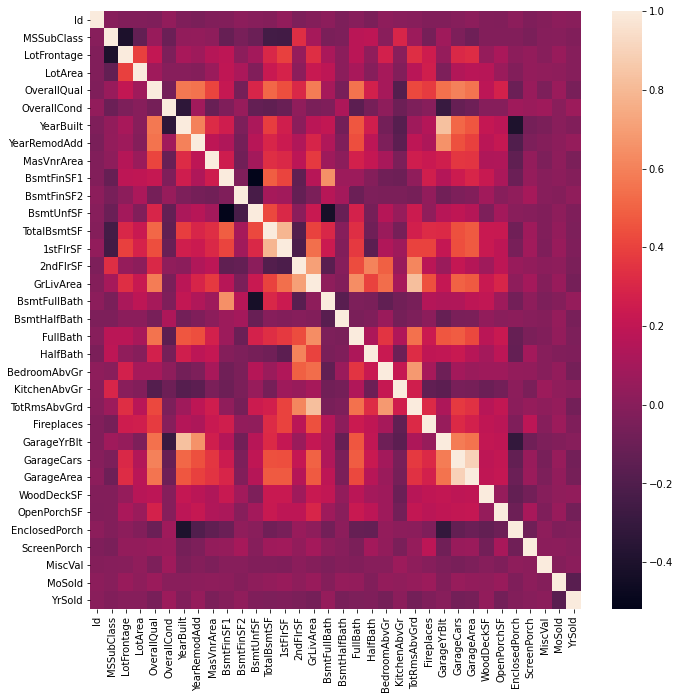

In [126]:

plt.figure(figsize=(11,11))
sns.heatmap(correlation_matrix)

In [127]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [128]:
correlated_features

{'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd'}

In [129]:
x_train.drop(labels=correlated_features, axis=1, inplace=True)
x_test.drop(labels=correlated_features, axis=1, inplace=True)

The corr() function takes a parameter called method, which allows us to specify the type of correlation. By default it is the pearson correlation, but it can also be specified as kendall or spearman.

## Statistical & Ranking Filter Methods

These methods are statistical tests that evaluate each feature individually. By shedding light on the target, they evaluate whether the variable is important in order to discriminate against the target.

Essentially, these methods rank the features based on certain criteria or metrics and then select the features with the highest ranking.

### Mutual Information

Mutual information a measure of the mutual dependence of two variables. It measures the amount of information obtained about one variable through observing the other variable. In other words, it determines how much we can know about one variable by understanding another—it’s a little bit like correlation, but mutual information is more general.

In machine learning, mutual information measures how much information the presence/absence of a feature contributes to making the correct prediction on Y.

If X and Y are independent, their MI is Zero. If X is deterministic of Y, then MI is the entropy of X, which is a notion in information theory that measures or quantifies the amount of information within a variable.
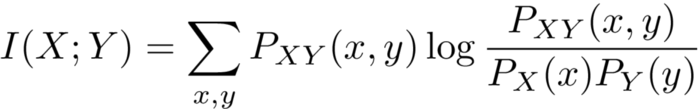

In [130]:
from sklearn.feature_selection import mutual_info_classif, chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

In [133]:
# select the number of features you want to retain.
#select_k = 10

# get only the numerical features.
#numerical_x_train = x_train[x_train.select_dtypes([np.number]).columns]


# create the SelectKBest with the mutual info strategy.
#selection = SelectKBest(mutual_info_classif, k=select_k).fit(numerical_x_train, y_train)

# display the retained features.
#features = x_train.columns[selection.get_support()]
#print(features)
#mutual_info(x_train, y_train)

## Chi-squared Score

This is another statistical method that’s commonly used for testing relationships between categorical variables.

Therefore, it’s suited for categorical variables and binary targets only, and the variables should be non-negative and typically boolean, frequencies, or counts.

What it does is simply compare the observed distribution between various features in the dataset and the target variable.

In [135]:
# change this to how much features you want to keep from the top ones.
#select_k = 10

# apply the chi2 score on the data and target (target should be binary).  
#selection = SelectKBest(chi2, k=select_k).fit(x_train, y_train)

# display the k selected features.
#features = x_train.columns[selection.get_support()]
#print(features)

### ANOVA Univariate Test
A univariate test, or more specifically ANOVA ( — short for ANalysis Of VAriance), is similar to the previous scores, as it measures the dependence of two variables.

ANOVA assumes a linear relationship between the variables and the target, and also that the variables are normally distributed.

It’s well-suited for continuous variables and requires a binary target, but sklearn extends it to regression problems, also.


In [136]:
# import the required functions and object.
#from sklearn.feature_selection import f_classif
#from sklearn.feature_selection import SelectKBest

# select the number of features you want to retain.
#select_k = 10

# create the SelectKBest with the mutual info strategy.
#selection = SelectKBest(f_classif, k=select_k).fit(x_train, y_train)

# display the retained features.
#features = x_train.columns[selection.get_support()]
#print(features)

The above example applies to classification tasks, but we can use ANOVA for regression tasks via the f_regression function provided in the sklearn library.

### Univariate ROC-AUC /RMSE

This method uses machine learning models to measure the dependence of two variables. It’s suitable for all variables, and also makes no assumptions about their distribution.

The measure here depends on the problem: we use RMSE for regression problems and ROC-AUC for classification problems.

The procedure is as follows:

- Build a decision tree using a single variable and target.
- Rank features according to the model RMSE or ROC-AUC
- Select the features with higher ranking scores.

In [137]:
#### UNIVARIAYTE RMSE
def univariate_rmse():
    mse_values = []
    for feature in x_train.columns:
        clf = DecisionTreeRegressor()
        clf.fit(x_train[feature].to_frame(), y_train)
        y_scored = clf.predict(x_test[feature].to_frame())
        mse_values.append(mean_squared_error(y_test, y_scored))
    mse_values = pd.Series(mse_values)
    mse_values.index = x_train.columns
    print(mse_values.sort_values(ascending=False))
    print(len(mse_values[mse_values > threshold]),'out of the %s featues are kept'% len(x_train.columns))
    keep_col = mse_values[mse_values > threshold]
    return keep_col

In [138]:
# UNIVARIATE ROC_AUC
def univariate_roc_auc():
    roc_values = []
    for feature in x_train.columns:
        clf = DecisionTreeClassifier()
        clf.fit(x_train[feature].to_frame(), y_train)
        y_scored = clf.predict_proba(x_test[feature].to_frame())
        roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    roc_values = pd.Series(roc_values)
    roc_values.index = X_train.columns
    print(roc_values.sort_values(ascending=False))
    print(len(roc_values[roc_values > threshold]),'out of the %s featues are kept'% len(X_train.columns))
    keep_col = roc_values[roc_values > threshold]
    return keep_col

#### Conclusion

At this point, you have some filter methods with which to start selecting features. These methods are always used at the beginning of the selection process to get rid of the irrelevant, duplicated, correlated, and constant features.

## WRAPPER METHODS

Wrappers require some method to search the space of all possible subsets of features, assessing their quality by learning and evaluating a classifier with that feature subset. The feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset. It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion. The wrapper methods usually result in better predictive accuracy than filter methods.

Let’s, discuss some of these techniques:

#### Forward Feature selection

#### Backward feature selection

#### Exhaustive Feature Selection

#### Recursive feature elimation

# EMBEDDED METHOD

These methods encompass the benefits of both the wrapper and filter methods, by including interactions of features but also maintaining reasonable computational cost. Embedded methods are iterative in the sense that takes care of each iteration of the model training process and carefully extracts those features which contribute the most to the training for a particular iteration.

Let’s, discuss some of these techniques click here:

#### LASSO REGULARIZATION(L1)

Regularization consists of adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model, i.e. to avoid over-fitting. In linear model regularization, the penalty is applied over the coefficients that multiply each of the predictors. From the different types of regularization, Lasso or L1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

# Random Forest Importance

Random Forests is a kind of a Bagging Algorithm that aggregates a specified number of decision trees. The tree-based strategies used by random forests naturally rank by how well they improve the purity of the node, or in other words a decrease in the impurity (Gini impurity) over all trees. Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.

 We have on purpose left the feature extraction techniques like Principal Component Analysis, Singular Value Decomposition, Linear Discriminant Analysis,

#### Ridge Regression (L2 Regularisation): 

The L2 Regularisation is also known as Ridge Regression or Tikhonov Regularisation which solves a regression model where the loss function is the linear least squares function and regularisation.

### Elastic Net: 

This linear regression model is trained with L1 and L2 as regulariser which allows for learning a sparse model where few of the weights are non-zero like Lasso and on the other hand maintaining the regularisation properties of Ridge.

# WRAPPER METHODS

In the last post in the series, we explored the filter methods that tend to select features independently and work with (essentially) any machine learning algorithm. Consequently, one of the disadvantages of these methods is that they tend to ignore the effect of the selected feature subset on the performance of the algorithm.

In addition, filter methods often evaluate features individually. In that case, some variables can be useless for prediction in isolation, but they can be quite useful when combined with other variables.


To prevent those issues, wrapper methods join the party in selecting the best feature subsets

#### Wrapper Methods: Definition

Wrapper methods work by evaluating a subset of features using a machine learning algorithm that employs a search strategy to look through the space of possible feature subsets, evaluating each subset based on the quality of the performance of a given algorithm.

These methods are called greedy algorithms because they aim to find the best possible combination of features that result in the best performant model— which will be computationally expensive, and often impractical in the case of exhaustive search.

Practically any combination of a search strategy and a machine learning algorithm can be used as a wrapper.

### Wrapper Methods: Advantages

Given the issues we encountered using filter methods, wrapper methods present two main advantages that deal with those issues:

- They detect the interaction between variables

- They find the optimal feature subset for the desired machine learning algorithm

The wrapper methods usually result in better predictive accuracy than filter methods.

### Wrapper Methods: Process

Wrapper methods work in the following way, generally speaking:

- Search for a subset of features: Using a search method (described next), we select a subset of features from the available ones.

- Build a machine learning model: In this step, a chosen ML algorithm is trained on the previously-selected subset of features.

- Evaluate model performance: And finally, we evaluate the newly-trained ML model with a chosen metric.

- Repeat: The whole process starts again with a new subset of features, a new ML model trained, and so on.

We stop until the desired condition is met, and then we choose the best subset with the best result in the evaluation phase.

### Stopping Criteria

At some point in time, we need to stop searching for a subset of features. To do this, we have to put in place some pre-set criteria (often somewhat arbitrary), around when this searching should stop. These criteria need to be defined by the machine learning engineer. Here are a couple of examples of these criteria:

- Model performance decreases.

- Model performance increases.

- A predefined number of features is reached.

The pre-set criteria, for example, can be metrics like ROC-AUC for classification or RMSE for regression.

### Search methods

- Forward Feature Selection: This method starts with no feature and adds one at a time.

- Backward Feature Elimination: This method starts with all features present and removes one feature at the time.

- Exhaustive Feature Selection: This method tries all possible feature combinations.

- Bidirectional Search: And this last one does both forward and backward feature selection simultaneously in order to get one unique solution.


In [62]:
import statsmodels.api as sm
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)         # for dataset dimension
print(boston.feature_names)      # for feature names
print(boston.target)             # for target variable
print(boston.DESCR)              # for data description

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 

In [63]:
import pandas as pd
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['Price'] = boston.target
X = bos.drop("Price", 1)       # feature matrix
y = bos['Price']               # target feature
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### 1. FORWARD SELECTION

In forward selection, we start with a null model and then start fitting the model with each individual feature one at a time and select the feature with the minimum p-value. Now fit a model with two features by trying combinations of the earlier selected feature with all other remaining features. Again select the feature with the minimum p-value. Now fit a model with three features by trying combinations of two previously selected features with other remaining features. Repeat this process until we have a set of selected features with a p-value of individual features less than the significance level.

In short, the steps for the forward selection technique are as follows :

- Choose a significance level (e.g. SL = 0.05 with a 95% confidence).

- Fit all possible simple regression models by considering one feature at a time. Total ’n’ models are possible. Select the feature with the lowest p-value.

- Fit all possible models with one extra feature added to the previously selected feature(s).

- Again, select the feature with a minimum p-value. if p_value < significance level then go to Step 3, otherwise terminate the process.

In [1]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [65]:
forward_selection(X,y)

<ipython-input-64-d9aa104cd376>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-64-d9aa104cd376>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-64-d9aa104cd376>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-64-d9aa104cd376>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


['LSTAT',
 'RM',
 'PTRATIO',
 'DIS',
 'NOX',
 'CHAS',
 'B',
 'ZN',
 'CRIM',
 'RAD',
 'TAX']

#### Implementing Forward selection using built-in functions in Python:

In [79]:
#!pip install mlxtend
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

SequentialFeatureSelector() function accepts the following major arguments :

- LinearRegression() is an estimator for the entire process. Similarly, it can be any classification based algorithm.

- k_features indicates the number of features to be selected. It can be any random value, but the optimal value can be found by analyzing and visualizing the scores for different numbers of features.

- forward and floating arguments for different flavors of wrapper methods, here, forward = True and floating = False are for forward selection technique.

- The scoring argument specifies the evaluation criterion to be used. For regression problems, there is only r2 score in default implementation. Similarly for classification, it can be accuracy, precision, recall, f1-score, etc.

- cv argument is for k-fold cross-validation.

In [81]:
sfs.fit(X,y)
sfs.k_feature_names_ # to get the final set of features

('CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT')

## 2. BACKWARD ELIMATION

In backward elimination, we start with the full model (including all the independent variables) and then remove the insignificant feature with the highest p-value(> significance level). This process repeats again and again until we have the final set of significant features.

In short, the steps involved in backward elimination are as follows:

- Choose a significance level (e.g. SL = 0.05 with a 95% confidence).

- Fit a full model including all the features.

- Consider the feature with the highest p-value. If the p-value > significance level then go to Step 4, otherwise terminate the process.

- Remove the feature which is under consideration.

- Fit a model without this feature. Repeat the entire process from Step 3.

In [82]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [84]:
backward_elimination(X,y)

['CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

### Implementing Backward elimination using built-in functions in Python:

In [85]:
#Sequential backward selection(sbs)
sbs = SFS(LinearRegression(),
         k_features=11,
         forward=False,
         floating=False,
         cv=0)
sbs.fit(X, y)
sbs.k_feature_names_

('CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT')

## Additional Note

Here we are directly using the optimal value of k_features argument in both forward selection and backward elimination. In order to find out the optimal number of significant features, we can use the hit and trial method for different values of k_features and make the final decision by plotting it against the model performance.

In [89]:
sfs1 = SFS(LinearRegression(),
         k_features=(3,11),
         forward=True,
         floating=False,
         cv=0)
sfs1.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(),
                          k_features=(3, 11))

D:\lal\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\lal\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


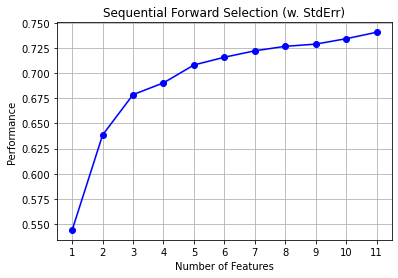

In [90]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

Here, on the y-axis, the performance label indicates the R-squared values for the different numbers of features.

## 3. Bi-directional elimination(Step-wise Selection)

It is similar to forward selection but the difference is while adding a new feature it also checks the significance of already added features and if it finds any of the already selected features insignificant then it simply removes that particular feature through backward elimination.

Hence, It is a combination of forward selection and backward elimination.

In short, the steps involved in bi-directional elimination are as follows:

- Choose a significance level to enter and exit the model (e.g. SL_in = 0.05 and SL_out = 0.05 with 95% confidence).

- Perform the next step of forward selection (newly added feature must have p-value < SL_in to enter).

- Perform all steps of backward elimination (any previously added feature with p-value>SL_out is ready to exit the model).

- Repeat steps 2 and 3 until we get a final optimal set of features.

In [91]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [92]:
stepwise_selection(X,y)

<ipython-input-91-824a394047ac>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-91-824a394047ac>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-91-824a394047ac>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-91-824a394047ac>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


['LSTAT',
 'RM',
 'PTRATIO',
 'DIS',
 'NOX',
 'CHAS',
 'B',
 'ZN',
 'CRIM',
 'RAD',
 'TAX']

### Implementing bi-directional elimination using built-in functions in Python:

The same SequentialFeatureSelector()function can be used to perform backward elimination by enabling forward and floating arguments.

In [93]:
# Sequential Forward Floating Selection(sffs)
sffs = SFS(LinearRegression(),
         k_features=(3,11),
         forward=True,
         floating=True,
         cv=0)
sffs.fit(X, y)
sffs.k_feature_names_

('CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT')

#### Limitations of Step Forward/Backward Selection

Besides the drawbacks of computation costs, there are some other points to pay attention to when working with SFS & SBS:

- Since we know that SFS adds features at each iteration, a problem can occur when we add up a feature that was useful in the beginning, but after adding more ones, is now non-useful. At this point, there’s no way to remove this kind of feature.

- The same thing happens to SBS but in the reverse direction—this is because of the inability of SBS to see the usefulness of a feature after being removed from the feature set.

For those reasons, and for more generalization for SBS and SFS, there are two methods that can solve such an issue: LRS and sequential floating.

### LRS or Plus-L, minus-R

LRS uses two parameters L and R (both integers) to repeatedly add and remove features from the solution subset. Here’s an explanation of how it works:

If L>R, LRS starts from the empty set of features and:

- Repeatedly adds L features
- Repeatedly removes R features

If L<R, LRS starts from the full set of features and:

- Repeatedly removes R features
- Repeatedly adds L features

LRS attempts to compensate for the weaknesses of SFS and SBS with some backtracking capabilities, but this method requires you to carefully set L and R parameters since there’s a lack of theory behind choosing the optimal values.


### Sequential Floating

For both backward and forward selection, sequential floating is an extension to LRS. Rather than choosing values for L and R to add and remove features, we determine this from the data directly.

During the search, the size of the subset will be floating up and down since we are adding and removing features.

##### How it works

The way this method works is quite simple to understand. Let’s explore it in the context of both methods:

- Step floating forward selection: After each forward step, SFFS performs backward steps as long as the objective function increases.

- Step floating backward selection: After each backward step, SFBS performs forward steps as long as the objective function increases.

Here’s a detailed explanation of how SFFS works in practice:

- Start from an empty set.

- Select the best feature as we usually do in SFS and add it.

- Then select the worst feature from this subset.

- Evaluate and check whether the objective function improves or not by deleting this feature. If it’s improving, we delete this feature; otherwise, we keep it.

- Repeat from step 2 until the stop criterion is reached.

The same steps should be followed with SFBS, except that instead of starting with an empty set, we start with a full one, then proceed with normal SBS. Then, instead of deleting features in step 4, we add one that can improve the objective function.

##### Implementation

To use the floating method in code, mlxtend provides a simple parameter to set in the previous object of SFS and SBS. This parameter is called floating and can be set to true or false depending on if you want to use this variant as a selection method.

##### Other Search Methods

Bidirectional Search (BDS): BDS applies SFS and SBS concurrently—SFS is performed from the empty set of features and SBS is performed from the full set of features.

But this can lead to an issue of converging to a different solution. To avoid this and to guarantee SFS and SBS converge to the same solution, we make the following constraints:

- Features already selected by SFS are not removed by SBS.

- Features already removed by SBS are not added by SFS.

#### Conclusion

Despite their time and space complexity, wrapper methods are great feature selection methods, and they should be used after eliminating some features with filter methods.

## EMBEDDED METHODS

We learned from the previous article a method that integrates a machine learning algorithm into the feature selection process. Those wrapper methods provide a good way to ensure that the selected features are the best for a specific machine learning model.


We concluded that using these methods will provide better results in terms of performance, but they’ll also cost us a lot of computation time/resources.


But what if we could include the feature selection process in ML model training itself? That could lead us to even better features for that model, in a shorter amount of time. This is where embedded methods come into play.

### Embedded Methods: Definition

Embedded methods complete the feature selection process within the construction of the machine learning algorithm itself. In other words, they perform feature selection during the model training, which is why we call them embedded methods.

A learning algorithm takes advantage of its own variable selection process and performs feature selection and classification/regression at the same time.

### Embedded Methods: Advantages

The embedded method solves both issues we encountered with the filter and wrapper methods by combining their advantages. Here’s how:

- They take into consideration the interaction of features like wrapper methods do.

- They are faster like filter methods.

- They are more accurate than filter methods.

- They find the feature subset for the algorithm being trained.

- They are much less prone to overfitting.

### Embedded Methods: Process

Any and all embedded methods work as follows:

- First, these methods train a machine learning model.

- They then derive feature importance from this model, which is a measure of how much is feature important when making a prediction.

- Finally, they remove non-important features using the derived feature importance.

 we’ll explore a few specific methods that use embedded feature selection: regularization and tree-based methods.

####  Using Regularization

Regularization in machine learning adds a penalty to the different parameters of a model to reduce its freedom. This penalty is applied to the coefficient that multiplies each of the features in the linear model, and is done to avoid overfitting, make the model robust to noise, and to improve its generalization.

There are three main types of regularization for linear models:

- lasso regression or L1 regularization
- ridge regression or L2 regularization
- elastic nets or L1/L2 regularization

- L1 regularization has shrinks some of the coefficients to zero, therefore indicating that a certain predictor or certain features will be multiplied by zero to estimate the target. Thus, it won’t be added to the final prediction of the target—this means that these features can be removed because they aren’t contributing to the final prediction.


- L2 regularization, on the other hand, doesn’t set the coefficient to zero, but only approaching zero—that’s why we use only L1 in feature selection.


- L1/L2 regularization is a combination of the L1 and L2. It incorporates their penalties, and therefore we can end up with features with zero as a coefficient—similar to L1.

In [95]:
# Lasso for Regression tasks, and Logistic Regression for Classification tasks.
#from sklearn.linear_model import Lasso, LogisticRegression
#from sklearn.feature_selection import SelectFromModel

# using logistic regression with penalty l1.
#selection = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
#selection.fit(x_train, y_train)

# see the selected features.
#selected_features = x_train.columns[(selection.get_support())]

# see the deleted features.
#removed_features = x_train.columns[(selection.estimator_.coef_ == 0).ravel().tolist()]


### Tree-based Feature Importance

Tree-based algorithms and models (i.e. random forest) are well-established algorithms that not only offer good predictive performance but can also provide us with what we call feature importance as a way to select features.

### Feature importance

Feature importance tells us which variables are more important in making accurate predictions on the target variable/class. In other words, it identifies which features are the most used by the machine learning algorithm in order to predict the target.


Random forests provide us with feature importance using straightforward methods — mean decrease impurity and mean decrease accuracy.

### How it works

A random forest is no more than a group of decision trees. Each of them is established over a random extraction of samples and features from the dataset, so an individual tree isn't able to see all the features or access all the observations.

Furthermore, every node in a decision tree is a condition on one feature—these nodes are designed to split the dataset into two different sets. Similar observation values will be in the same set, and different ones will be in the other.

Thus, the importance of each feature is derived by how “pure” each of the sets is.

The measure based on which optimal condition is chosen is known as an impurity. For classification, it’s typically either the Gini impurity or information gain/entropy; and for regression trees, it’s the variance.

Thus, when training a tree, feature importance is calculated as the decrease in node impurity weighted in a tree. The higher the value, the more important the feature.

In [96]:
# from sklearn.ensemble import RandomForestClassifier

# create the random forest with your hyperparameters.
# model = RandomForestClassifier(n_estimators=340)

# fit the model to start training.
# model.fit(x_train, y_train)

# get the importance of the resulting features.
# importances = model.feature_importances_

# create a data frame for visualization.
# final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
# final_df.set_index('Importances')

# sort in ascending order to better visualization.
# final_df = final_df.sort_values('Importances')

# plot the feature importances in bars.
# final_df.plot.bar() 

 ## HYBRID METHODS

The definition here is quite simple—rather than using a single approach to select feature subsets as the previous methods do, hybrid methods combine the different approaches to get the best possible feature subset.


The way to combine these approaches is up to the engineer, given that you have a lot of methods in your toolbox. You can, for example, start by performing filter methods by eliminating constant, quasi-constant and duplicated features. Then, in the second step, you could use wrapper methods to select the best feature subset from the previous step. This is just one simple, high-level approach.


We’ll explore a few different hybrid methods in this article, but the idea is to combine weaker methods to end up with a more powerful one.

#### Hybrid Methods: Advantages

The big advantage that hybrid methods offer is that they take the best advantages from other feature selection methods, and as such, can reduce their disadvantages. This can (and hopefully will) result in:

- High performance and accuracy
- Better computational complexity than wrapper methods
- Models that are more flexible and robust against high dimensional data

#### Hybrid Methods: Process

The process of creating hybrid feature selection methods depends on what you choose to combine. The main priority is to select the methods you’re going to use, then to follow their processes.

In the following sections, you’ll see how we can combine methods, starting with wrapper approaches since they provide the best feature subset most of the time.

## Using Filter & Wrapper methods

In part two of our series, which covered filter methods, we saw ranking methods like mutual information and Chi score, which order features independently without involving any learning algorithm. From there, the best features are selected from the ranking list.

The idea here is to use these ranking methods to generate a feature ranking list in the first step, then use the top k features from this list to perform wrapper methods (like SFS or SBS).

With that, we can reduce the feature space of our dataset using these filter-based rangers in order to improve the time complexity of the wrapper methods.

### Using Embedded & Wrapper Methods

The thought here is to also acquire a ranking of features and then establish wrapper methods to search for the best possible features subset.

If you’ll recall, embedded methods offer a way to establish feature importance. This can be used to select top features and then perform a wrapper methods search.

Another way to use embedded methods is by using what’s called recursive feature elimination and recursive feature addition, which are illustrated in more detail below.

#### Recursive Feature Elimination

This is just a fancy name for a simple method that works as follows:

- Train a model on all the data features. This model can be a tree-based model, lasso, logistic regression, or others that can offer feature importance. Evaluate its performance on a suitable metric of your choice.

- Derive the feature importance to rank features accordingly.

- Delete the least important feature and re-train the model on the remaining ones.

- Use the previous evaluation metric to calculate the performance of the resulting model.

- Now test whether the evaluation metric decreases by an arbitrary threshold (you should define this as well). If it does, that means this feature is important. Otherwise, you can remove it.

- Repeat steps 3–5 until all features are removed (i.e. evaluated).

You might be thinking to say that this is just like the step backward features selection that we did in our post on wrapper methods, but it isn’t. The difference is that SBS eliminates all the features first in order to determine which one is the least important. But here, we’re getting this information from the machine learning model’s derived importance, so it removes the feature only once rather than removing all the features at each step.

That's why this approach is faster than pure wrapper methods and better than pure embedded methods. But as a drawback, the main problem with that is we have to use an arbitrary threshold value to decide whether to keep a feature or not.

As a consequence, the smaller this threshold value, the more features will be included in the subset, and vice versa.

In [97]:
# from sklearn.feature_selection import RFECV

# use any other model you want here.
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(n_estimators=411)

# build the RFE with CV option.
# rfe = RFECV(model, min_features_to_select = 3, step = 1 , cv=5, scoring='accuracy')

# fit the RFE to our data.
# selection  = rfe.fit(x_train, y_train)

# print the selected features.
# print(x_train.columns[selection.support_])

In [99]:
# nother method to implememts
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import roc_auc_score 

# array to hold the feature to be removed.
#features_to_remove = []

# set this value according to you.
#threshold=0.003

# create your prefered model and  fit it to the training data.
#model_all_features = RandomForestClassifier(n_estimators=221)
#model_all_features.fit(x_train, y_train)

# get the first score of all the features. (you can use your metric)
#y_pred_test = model_all_features.predict(x_test)
#auc_score_all = roc_auc_score(y_test, y_pred_test)

# loop over all the feature to do recursive feature elimination.
#for feature in x_train.columns:
    
    #model = RandomForestClassifier(n_estimators=221)
    
    # delete the current feature.
    #x_train_rfe = x_train.drop(features_to_remove + [feature], axis=1)
    #x_test_rfe = x_test.drop(features_to_remove + [feature], axis=1)

    # fit model with all variables minus the removed features and the feature to be evaluated.
    #model.fit(x_train_rfe, y_train)
    #y_pred_test = model.predict(x_test_rfe)
    #auc_score_int = roc_auc_score(y_test, y_pred_test)
    
    # determine the drop in the roc-auc
    #diff_auc = auc_score_all - auc_score_int

    # compare the drop in roc-auc with the threshold
    #if diff_auc < threshold:
        # if the drop in the roc is small and we remove the
        # feature, we need to set the new roc to the one based on
        # the remaining features
        #auc_score_all = auc_score_int
        
        # and append the feature to remove to the list
        #features_to_remove.append(feature)
        
# print the features that need removing.
#print(features_to_remove)  
#features_to_keep = [x for x in x_train.columns if x not in features_to_remove]

# print the features to keep.
#print('total features to keep: ', len(features_to_keep))


## Recursive Feature Addition

With the previous method, we started from all the features and removed one at the time. Now it’s the opposite case—we start with no features and add one feature at the time. Here are the steps:

- Train a model on all the data and derive the feature importance to rank it accordingly. This model can be a tree-based model, lasso, logistic regression, or others that can offer feature importance.

- From that initial model, create another with the most important feature and evaluate it with an evaluation metric of your choice.

- Add another important feature and use it to re-train the model, along with any feature from the previous step.

- Use the previous evaluation metric to calculate the performance of the resulting model.

- Now test whether the evaluation metric increases by an arbitrarily-set threshold (you should define this as well).

- If that’s the case, it means that this feature is important; otherwise, we can remove it.

- Repeat steps 3–5 until all features are added (i.e. evaluated).

The difference between this method and step forward feature selection is similar to what we discussed in RFE—it doesn’t look for all features first in order to determine which ones to add, so it’s faster than wrapper methods.

sklearn doesn’t provide a RecursiveFeatureAddition algorithm, so you’ll need to implement it on your own:

In [100]:
# you can use any other algorithm.
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import roc_auc_score 

# array to hold the feature to be keept.
#features_to_keep = [x_train.columns[0]]

# set this value according to you.
#threshold = 0.002

# create your prefered model and  fit it to the training data.
#model_one_feature = RandomForestClassifier(n_estimators=332)
#model_one_feature.fit(x_train[[x_train.columns[0]]], y_train)

# evaluate against your metric.
#y_pred_test = model_one_feature.predict(x_test[[x_train.columns[0]]])
#auc_score_all = roc_auc_score(y_test, y_pred_test)

# start iterating from the feature.
#for feature in x_train.columns[1:]:
    
    #model = RandomForestClassifier(n_estimators=332)
    
    # fit model with  the selected features and the feature to be evaluated
    #model.fit(x_train[features_to_keep + [feature]], y_train)
    #y_pred_test = model.predict(x_test[features_to_keep + [feature]])
    #auc_score_int = roc_auc_score(y_test, y_pred_test)

    # determine the drop in the roc-auc
    #diff_auc = auc_score_int - auc_score_all

    # compare the drop in roc-auc with the threshold
    #if diff_auc >= threshold:
        
        # if the increase in the roc is bigger than the threshold
        # we keep the feature and re-adjust the roc-auc to the new value
        # considering the added feature
        #auc_score_all = auc_score_int
        #features_to_keep.append(feature)

# print the feature to keep.
#print(features_to_keep)

Hybrid methods offer a great way to combine weak feature selection methods to obtain more robust and powerful ways to select variables. The described methods in this article are just examples of what you can combine, so feel free to test other combinations and see what gives you better results for your use case.
That’s the beauty of machine learning—it’s not always guaranteed that you will find the optimal solution just by copying and pasting code — it’s about testing and seeing what best fits your problem.

## ADVANCED METHOD FEATURE SELECTION

# Dimensionality Reduction

Dimensionality reduction isn’t quite the same as feature selection, even though both try to reduce the number of features. While feature selection selects and excludes some features without making any transformation, dimensionality reduction transforms features into a lower dimension.


The methods explained in this article use dimensionality reduction as a way to perform feature selection.

### Principal Component Analysis

Principal component analysis (or PCA for short) is a dimensionality reduction technique that uses linear algebra to transform a dataset into a compressed form.

To transform data from one dimension to another, PCA starts by calculating something called the Eigen decomposition (or singular value decomposition — SVD in other implementation) of the covariance matrix of the features.

This means that PCA first searches the correlation between features and then builds new features that preserve the same explained variance of the original ones. This process results in a lower-dimensional projection of the data that presents the maximal data variance.

Using this information from features’ explained variance, we can measure the importance of a given variable and see how much it’s contributing to the reduced feature space that PCA obtains.

So feature selection using PCA involves calculating the explained variance of each feature, then using it as feature importance to rank variables accordingly.

In [101]:
# Feature Extraction with PCA
# from sklearn.decomposition import PCA

# create the pca object with all the features
# pca = PCA(n_components=x_train.shape[1])

# fit the object to our data
# fit = pca.fit(x_train)

# print out the results
# print(fit.explained_variance_ratio_)
# print(fit.components_)

There are many other algorithms to do dimensionality reduction to obtain feature importance, one of which is called linear discriminant analysis (LDA).

In [103]:
#THis technique advanced read when u expert
##### Heuristic Search Algorithms
##### Genetic Algorithms
##### Permutation Importance

## Permutation importance

What permutation importance does is basically randomly shuffle the values of a feature (without touching the other variables or the target) to see how this permutation affects the performance metric of the machine learning model. Note that the choice of the metric is up to you.

It’s actually surprisingly straightforward. We measure the importance of a feature by measuring the increase in the model’s prediction error after permuting the feature values. This way, we’re breaking the relationship between the feature and the true outcome.

- A feature is “important” if shuffling its values increases the model error. In this case, the model relies on the feature for the prediction.

- A feature is “non-important” if shuffling its values leaves the model error unchanged. In this case, the model ignores the feature for the prediction.

In [105]:
#import whatever algorithm you want.
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import roc_auc_score

# build your model and train it.
#model = RandomForestClassifier(n_estimators=221)
#model.fit(x_train, y_train)

# get the default score.
#train_auc = roc_auc_score(y_train, model.predict(x_train))
#feature_dict_scores = {}

# loop over all the features
#for feature in x_train.columns:

    # copy the dataset, because we want to do some permutation.
    #x_train_copy = x_train.copy().reset_index(drop=True)
    #y_train_copy = y_train.copy().reset_index(drop=True)
    
    # shuffle an individual feature.
    #x_train_copy[feature] = x_train_copy[feature].sample(frac=1,random_state=random_state)
                                           #.reset_index(drop=True)

    
    # make a prediction with permuted feature and calculate roc auc
    #shuff_auc = roc_auc_score(y_train_copy, model.predict(x_train_copy))
    
    # save the drop in dictionary.
    #feature_dict_scores[feature] = (train_auc - shuff_auc)
    
# print the resulting dictionary , feature => how much it drop the score.
#print(feature_dict_scores)

There is a library called skater that also implements a more advanced technique in permutation importance called model-agnostic permutation feature importance, so check it out.

In [106]:
#### Deep learning me AUTOENCODERS use for feature selection